In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random

### Choosing a binary fraction (44%) of the sample to have binary companions.

In [15]:
#Adding binaries to the data 
g_stars = pd.read_csv('/Users/jessicaschonhut/flares_paper/g_stars.csv')
binaries = g_stars.sample(frac=0.44014209591474255, replace=False)
print("Number of binaries in the sample: " + str(len(binaries))) # Print number of binaries in the sample

Number of binaries in the sample: 36299


### Checking that the sample is random by plotting parameters for the sample before and after it was cut. 

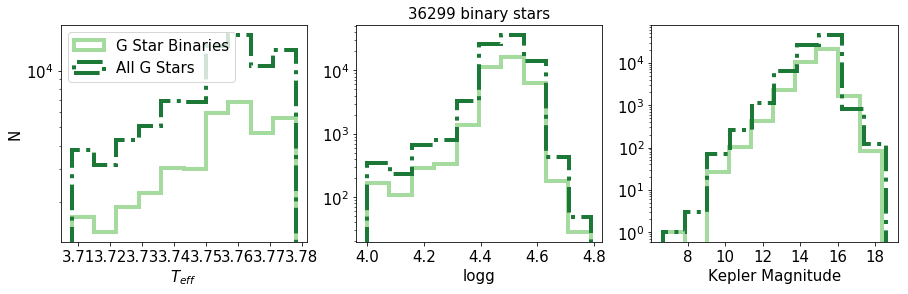

In [16]:
plt.figure(figsize=(15, 4))
plt.subplot(131)
plt.hist(binaries['logTe'], histtype='step', color='#a6dba0', linewidth=4, label='G Star Binaries')
plt.hist(g_stars['logTe'], histtype='step', linewidth=4, linestyle='-.', label='All G Stars', color='#1b7837')
plt.ylabel('N', fontsize=15)
plt.legend(loc=2, fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.yscale('log')
plt.xlabel(r'$T_{eff}$', fontsize=15)
plt.subplot(132)
plt.title(str(len(binaries)) + ' binary stars', fontsize=15)
plt.hist(binaries['logg'], histtype='step', color='#a6dba0', linewidth=4)
plt.hist(g_stars['logg'], histtype='step', linewidth=4, linestyle='-.', color='#1b7837')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('logg', fontsize=15)
plt.yscale('log')
plt.subplot(133)
plt.hist(binaries['Kepler'], histtype='step', color='#a6dba0', linewidth=4)
plt.hist(g_stars['Kepler'], histtype='step', linewidth=4, linestyle='-.', color='#1b7837')
plt.xlabel('Kepler Magnitude', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.yscale('log')
plt.savefig('/Users/jessicaschonhut/flares_paper/g_stars_comparison_binaries.png')
np.savetxt('/Users/jessicaschonhut/flares_paper/G_with_binaries.csv', binaries, delimiter=',', header='index,Gc,logAge,[M/H],m_ini,logL,logTe,logg,m-M0,Av,m2/m1,mbol,Kepler,g,r,i,z,DDO51_finf,J,H,Ks,Mact')

### Choosing periods and mass ratios for each of the binary companions from distributions.

In [17]:
data_path = '/Users/jessicaschonhut/flares_paper/'
def period_of_binary(num_of_stars): 
    mu, sigma = 5.03, 2.28 
    distribution = np.random.normal(mu, sigma, num_of_stars) 
    period = random.choice(distribution)  
    return period 

def mass_ratio_of_binary(num_of_stars): 
    mass_ratio = random.uniform(0.1, 1) 
    return mass_ratio 

binaries = pd.read_csv(data_path + 'G_with_binaries.csv')

periods = [] 
mass_ratios = [] 

for i in range(0, len(binaries['# index'])): 
    period = period_of_binary(1000) 
    mass_ratio = mass_ratio_of_binary(1000) 
    periods.append(period)
    mass_ratios.append(mass_ratio)

#Save a new CSV file with all the columns 
full_sample_array = np.column_stack((binaries,periods,mass_ratios))
np.savetxt(data_path + 'G_with_binaries_with_parameters.csv', full_sample_array, delimiter=',', header='index,Gc,logAge,[M/H],m_ini,logL,logTe,logg,m-M0,Av,m2/m1,mbol,Kepler,g,r,i,z,DDO51_finf,J,H,Ks,Mact,periods,mass_ratios')
binaries_with_parameters = pd.read_csv(data_path + 'G_with_binaries_with_parameters.csv')

### Testing the periods and mass ratios against larger samples of both to make sure they converge to the distributions they were pulled from.

36299


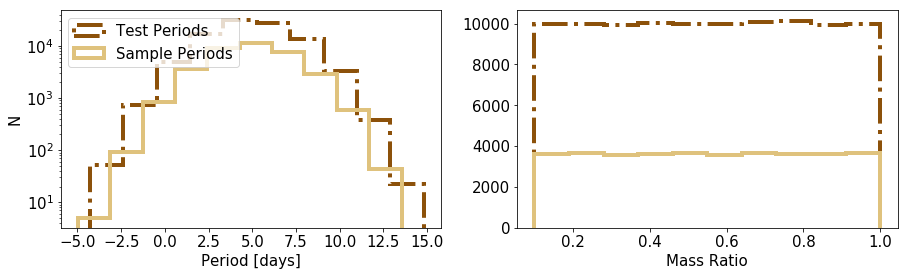

In [18]:
numbers = np.linspace(0, 100000, 100000)
print(len(binaries_with_parameters))
test_periods = []
test_mass_ratios = []
for i in numbers:
    a = period_of_binary(10000)
    test_periods.append(a)
for i in numbers: 
    a = mass_ratio_of_binary(10000)
    test_mass_ratios.append(a)

plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.hist(test_periods, histtype='step', label='Test Periods', color='#8c510a', linewidth=4, linestyle='-.')
plt.hist(periods, histtype='step', label='Sample Periods', color='#dfc27d', linewidth=4)
plt.legend(loc=2, fontsize=15)
plt.ylabel('N', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Period [days]', fontsize=15)
plt.yscale('log')
plt.subplot(122)
plt.hist(test_mass_ratios, histtype='step', color='#8c510a', linewidth=4, linestyle='-.')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Mass Ratio', fontsize=15)
plt.hist(mass_ratios, histtype='step', color='#dfc27d', linewidth=4)
plt.savefig(data_path + 'period_mass_ratio.png') 

### Determining masses for the secondary star

In [19]:
g_binaries = pd.read_csv(data_path + 'G_with_binaries_with_parameters.csv')

m2_m1 = pd.read_csv(data_path + 'G_with_binaries_with_parameters.csv')['mass_ratios']
m_act = pd.read_csv(data_path + 'G_with_binaries_with_parameters.csv')['Mact']
m2 = m2_m1 * m_act
full_sample_array = np.column_stack((g_binaries,m2))

np.savetxt(data_path + 'G_with_binaries_with_parameters_2.csv', full_sample_array, delimiter=',', header='index,Gc,logAge,[M/H],m_ini,logL,logTe,logg,m-M0,Av,m2/m1,mbol,Kepler,g,r,i,z,DDO51_finf,J,H,Ks,Mact,periods,mass_ratios,sec_mass')

### Testing that these secondary masses behave as expected

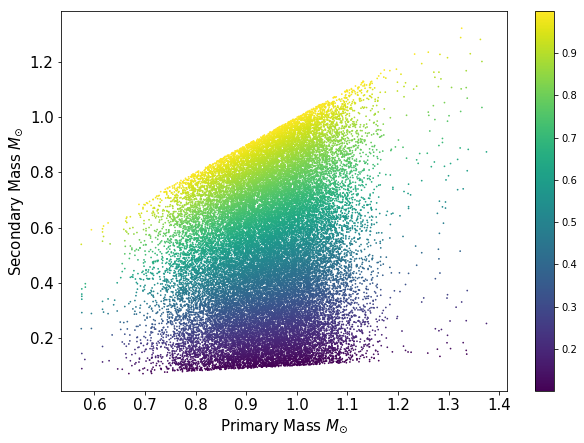

In [20]:
bins_with_sec_masses = pd.read_csv(data_path + 'G_with_binaries_with_parameters_2.csv')
plt.figure(figsize=(10, 7))
plt.scatter(bins_with_sec_masses['Mact'], bins_with_sec_masses['sec_mass'], c=bins_with_sec_masses['mass_ratios'], s=0.5)
plt.xlabel(r'Primary Mass $M_{\odot}$', fontsize=15)
plt.ylabel(r'Secondary Mass $M_{\odot}$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.colorbar()
plt.savefig(data_path + 'secondary_masses.png')

### Determining secondary composition and temperature

In [21]:
teff = pd.read_csv(data_path + 'final_sample.csv')['logTe'] #Primary temp
comp = pd.read_csv(data_path + 'final_sample.csv')['[M/H]'] #Primary comp
mass = pd.read_csv(data_path + 'final_sample.csv')['Mact'] #Primary mass
sec_mass = pd.read_csv(data_path + 'G_with_binaries_with_parameters_2.csv')['sec_mass']
full_sample = pd.read_csv(data_path + 'G_with_binaries_with_parameters_2.csv')

sec_mass = list(sec_mass)
mass = list(mass)
teff = list(teff)
final_temperature_list = []
final_composition_list = []
temperature_list = []
composition_list = []

print('running')

for i in sec_mass:

    sec_mass_compare = min(mass, key=lambda x:abs(x-i))
    idx = mass.index(sec_mass_compare)
    sec_comp = comp[idx]
    sec_temp = teff[idx]
    final_temperature_list.append(sec_temp)
    final_composition_list.append(sec_comp)

full_sample_array = np.column_stack((full_sample,final_temperature_list,final_composition_list))
np.savetxt(data_path + 'G_with_binaries_with_parameters_3.csv', full_sample_array, delimiter=',', header = 'index,Gc,logAge,[M/H],m_ini,logL,logTe,logg,m-M0,Av,m2/m1,mbol,Kepler,g,r,i,z,DDO51_finf,J,H,Ks,Mact,periods,mass_ratios,sec_mass,sec_temp,sec_comp')

running


### Comparing the secondary temperatures and compositions in the original TRILEGAL sample with those chosen for the M stars.

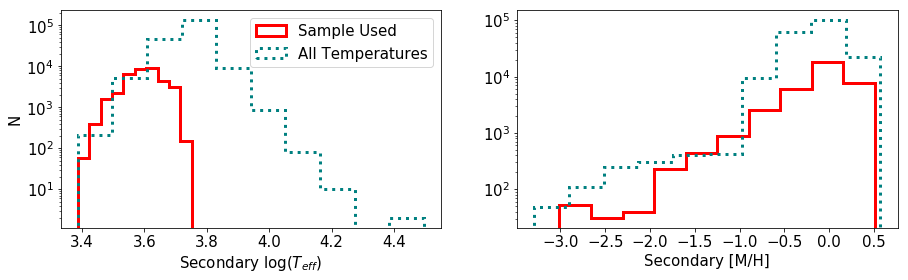

In [27]:
trilegal_teff = pd.read_csv(data_path + 'final_sample.csv')['logTe']
trilegal_comp = pd.read_csv(data_path + 'final_sample.csv')['[M/H]']

#Testing secondary temperature and composition 
plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.hist(final_temperature_list, histtype='step', label='Sample Used', color='red', linewidth=3)
plt.hist(trilegal_teff, histtype='step', label='All Temperatures', color='teal', linewidth=3, linestyle=':')
plt.xlabel(r'Secondary log($T_{eff}$)', fontsize=15)
plt.ylabel('N', fontsize=15)
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.subplot(122)
plt.hist(final_composition_list, histtype='step', color='red', linewidth=3)
plt.hist(trilegal_comp, histtype='step', color='teal', linewidth=3, linestyle=':')
plt.xlabel('Secondary [M/H]', fontsize=15)
plt.xticks(fontsize=15)
plt.yscale('log')
plt.yticks(fontsize=15)
plt.savefig(data_path + 'secondary_temp_and_comp.png')